# Project : Open StreetMap Wrangling : Oshawa, ON, Canada

#### By : Surya Kari 

### Part 1 : Exploring Oshawa Map

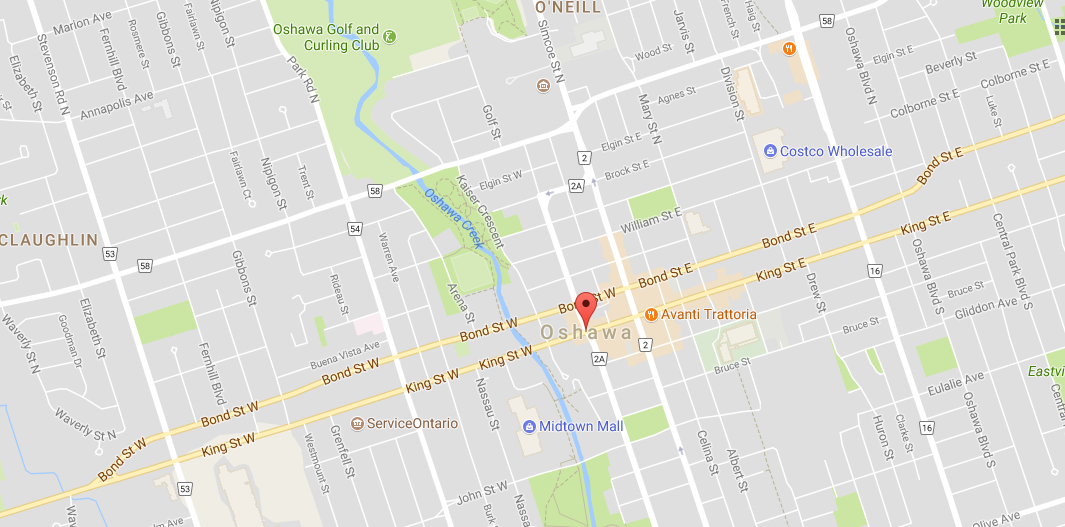

In [60]:
from IPython.display import Image
Image(filename='Oshawa.png')

Oshawa is an industrial city in Ontario, Canada. It is regarded as the most easternly flank of the Greater Toronto Area and is home to the Canadian General Motors headquarters and its factory. Oshawa is special to me because it is where I brought my first (And only home as of June 2017). According to the last census data, the last recorded population of Oshawa was about 159,000 people. 

In [61]:
filename = "oshawa.osm"

In [62]:
import Parse_Map
Parse_Map.numberoftags(filename)

{'bounds': 1,
 'member': 9894,
 'nd': 554990,
 'node': 450987,
 'osm': 1,
 'relation': 9898,
 'tag': 9897,
 'way': 554992}

The Oshawa map is 73 MB in size and as you can see, it has over 1.5 Million top level tags

### Part 2 : Problems with the Oshawa map data

#### Key Types :

We are tracking 4 different kinds of tag attributes :
    * 1) "lower", for tags that contain only lowercase letters and are valid
    * 2) "lower_colon", for otherwise valid tags with a colon in their names
    * 3) "problemchars", for tags with problematic characters
    * 4) "other", for other tags that do not fall into the other three categories

In [63]:
import Tags_Audit
Tags_Audit.parse_map(filename)

{'lower': 182314, 'lower_colon': 140126, 'other': 330120, 'problemchars': 0}

Thankfully, there seem to be no problemchars in the Oshawa street names Dataset

#### User Statistics:

This being an opensource dataset, lots of users contribute and revise the streetmap. Lets take a look at the number of users that have helped create and maintain the Oshawa Open Streetmap

In [80]:
import User_Lookup
import operator
len(User_Lookup.count_users(filename))
sorted_users = sorted(User_Lookup.count_users(filename).items(), key=operator.itemgetter(1),reverse=True)
sorted_users[:10]

[('1679', 210990),
 ('51600', 30863),
 ('155461', 11528),
 ('3551880', 7425),
 ('92209', 6430),
 ('76077', 5176),
 ('1060930', 1976),
 ('734714', 1575),
 ('951370', 1373),
 ('4940486', 1015)]

As we can see, there are 259 contributors to the Oshawa Streetmap. The User with an id 1679 has contributed to more than 210K edits. That is 7 times more than the next highest contributor.

#### Street Type Audit :

In [68]:
import Street_Audit3
Street_Audit3.audit_street(filename)

defaultdict(set,
            {'10': {'Concession Road  10', 'Concession Road 10'},
             '12': {'Highway  7 & 12'},
             '19': {'Regional Road 19'},
             '2': {'Highway  2',
              'Highway 2',
              'Old Highway 2',
              'Regional Highway 2'},
             '20': {'Regional Road  20', 'Regional Road 20'},
             '21': {'Regional Road 21'},
             '3': {'Concession Road 3', 'Regional Road  3', 'Regional Road 3'},
             '4': {'Concession Road 4'},
             '42': {'Regional Road 42'},
             '57': {'Regional Road  57', 'Regional Road 57'},
             '6': {'Concession Road  6', 'Concession Road 6'},
             '7': {'Concession Road  7', 'Concession Road 7'},
             '7A': {'Highway 7A'},
             '8': {'Concession Road 8'},
             '9': {'Concession Road  9', 'Concession Road 9'},
             'Ave': {'455 Mayfair Ave',
              '460 Mayfair Ave',
              '480 Mayfair Ave',
          

#### Count Street Types

In [69]:
import Street_Audit3
print (Street_Audit3.count_street(filename))


defaultdict(<class 'set'>, {'North': 2441, 'South': 1684, '2': 135, 'Road': 2942, 'Drive': 5585, 'Court': 3195, 'Crescent': 2395, 'East': 2173, 'Street': 7266, 'West': 1612, '7': 92, 'Avenue': 4517, 'Lane': 431, '3': 84, '6': 98, '42': 6, '4': 36, '57': 82, 'Townline': 18, 'Square': 130, 'Boulevard': 994, 'Place': 691, 'Gate': 100, 'Circle': 128, 'Path': 6, 'Trail': 123, 'Heights': 27, 'Terrace': 4, 'Way': 210, 'Parkway': 22, 'Greenway': 60, '21': 6, 'Manvers': 14, '20': 76, '8': 62, '10': 62, 'Clarke': 4, '9': 32, '19': 14, 'Line': 4, '7A': 14, '12': 26, 'Sideroad': 28, 'Loop': 8, 'N': 48, 'Rd': 36, 'E': 51, 'St': 58, 'Dr': 71, 'Ave': 19, 'Ave.': 1, 'Cres': 3, 'Highway': 2, 'Ct': 2, 'w': 1, 'west': 1, 'Driver': 5, 'Champions': 3})


Since it is a little hard to see what kind of street types we have in a massive city (*wink*) like Oshawa, I have created a function that will count them for us. 

As you can see, We have quite some unconventional names like <b>Ave or Ave. for Avenue, Cres for Crescent, Ct for Court</b> etc. Our next step would be to change these to the correct street type names so we have a better database to work with

### Summary of Problems faced with the OpenStreetMap for OSHAWA

1) This is by no means a comprehensive set of problems with this map

2) More can be done to enhance this, by looking at faulty phone numbers, fixing issues with postal codes, fixing location specific information etc

3) The problems that we have seen has been mostly with the over abbreviation of streetnames. This will pose a problem when we do database queries, since we might not have the entire set of information when a query is run. 


### Part 3 : Fix Street Names

In [74]:
import Street_Audit_Fixes
Street_Audit_Fixes.audit_street(filename)

defaultdict(set,
            {'10': {'Concession Road  10', 'Concession Road 10'},
             '12': {'Highway  7 & 12'},
             '19': {'Regional Road 19'},
             '2': {'Highway  2',
              'Highway 2',
              'Old Highway 2',
              'Regional Highway 2'},
             '20': {'Regional Road  20', 'Regional Road 20'},
             '21': {'Regional Road 21'},
             '3': {'Concession Road 3', 'Regional Road  3', 'Regional Road 3'},
             '4': {'Concession Road 4'},
             '42': {'Regional Road 42'},
             '57': {'Regional Road  57', 'Regional Road 57'},
             '6': {'Concession Road  6', 'Concession Road 6'},
             '7': {'Concession Road  7', 'Concession Road 7'},
             '7A': {'Highway 7A'},
             '8': {'Concession Road 8'},
             '9': {'Concession Road  9', 'Concession Road 9'},
             'Avenue': {'1st Avenue',
              '2nd Avenue',
              '3rd Avenue',
              '455 May

In [94]:
import Street_Audit_Fixes
Street_Audit_Fixes.count_street(filename)

defaultdict(set,
            {'10': 62,
             '12': 26,
             '19': 14,
             '2': 135,
             '20': 76,
             '21': 6,
             '3': 84,
             '4': 36,
             '42': 6,
             '57': 82,
             '6': 98,
             '7': 92,
             '7A': 14,
             '8': 62,
             '9': 32,
             'Avenue': 4537,
             'Boulevard': 994,
             'Champions': 3,
             'Circle': 128,
             'Clarke': 4,
             'Court': 3197,
             'Crescent': 2398,
             'Drive': 5661,
             'East': 2224,
             'Gate': 100,
             'Greenway': 60,
             'Heights': 27,
             'Highway': 2,
             'Lane': 431,
             'Line': 4,
             'Loop': 8,
             'Manvers': 14,
             'North': 2489,
             'Parkway': 22,
             'Path': 6,
             'Place': 691,
             'Road': 2978,
             'Sideroad': 28,
             '

As you can see from the cell above, when you compare it to the Counts of Street Types before the fix, we see that most of the problems with Ave., Ct etc are resolved. Lets again take a look at the street types after fixing it

In [76]:
import FixStNames
FixStNames.fix_street(filename)

715 Grandview St N => 715 Grandview St North
1011 Simcoe St N => 1011 Simcoe St North
1055 Central Park Blvd N => 1055 Central Park Blvd North
1331 Mary St N => 1331 Mary St North
1400 Mary St N => 1400 Mary St North
155 Glovers Rd => 155 Glovers Road
120 Nonquon Rd => 120 Nonquon Road
100 Taunton Rd E => 100 Taunton Rd East
Beatrice St E => Beatrice St East
510 Rossland Rd E => 510 Rossland Rd East
33 Taunton Rd E => 33 Taunton Rd East
122 Colborne St E => 122 Colborne St East
520 Rossland Rd E => 520 Rossland Rd East
1250 Pentland St => 1250 Pentland Street
222 Pearson St => 222 Pearson Street
1254 Pentland St => 1254 Pentland Street
Baldwin St => Baldwin Street
100 Rideau St => 100 Rideau Street
Chatterson St => Chatterson Street
Masson St => Masson Street
1330 Trowbridge Dr => 1330 Trowbridge Drive
221 Ormond Dr => 221 Ormond Drive
275 Ormond Dr => 275 Ormond Drive
460 Woodmount Dr => 460 Woodmount Drive
Wilson House Dr => Wilson House Drive
1087 Ormond Dr => 1087 Ormond Drive
220 

### Part 4: Creating CSV files from the fixed Oshawa dataset. This is the step before we create a Database and do our analysis 

This Function below will create CSV files for the way and node tags

In [77]:
import Data
Data.process_map(filename, validate=True)

### Part 5 : We create a SQLITE database using Terminal in Mac. This will let us do more sql style database queries

<b>Step 1</b>: Open Terminal in Mac

<b>Step 2</b>: Type in sqlite3 (Mac OS comes preinstalled with SQL Lite)

<b>Step 3</b> : Import the CSV files we created using Step 4
         Format : import csvfile TableName
         

> sqlite> import way_nodes.csv way_nodes

> sqlite> import ways.csv ways

> sqlite> import way_tags.csv way_tags

> sqlite> import nodes.csv nodes

> sqlite> import nodes_tags.csv nodes_tags


### Data Overview

> <b> Oshawa.osm </b> : 73 MB

> <b> nodes.csv  </b> : 30.9 MB

> <b> nodes_tags.csv </b> : 7.5 MB

> <b> ways.csv </b> : 3.7 MB

> <b> ways_nodes.cv </b> : 7.8 MB

> <b> ways_tags.csv </b> : 7.8 MB


#### Number of Unique Users

> <b> Select Count(Distinct(b.uid)) FROM (Select uid from nodes union all select uid from ways) b; </b>

259 Users

#### Number of Nodes

> <b> Select count(*) from nodes; </b>

293,287 Nodes

#### Number of Ways

> <b> Select count(*) from ways; </b>

48,724 Ways

#### Number of Unique Contributors

> <b> SELECT b.user, COUNT(*) as num
        FROM (SELECT user FROM Nodes UNION ALL SELECT user FROM Ways) b
        GROUP BY e.user
        ORDER BY num DESC
        LIMIT 10; </b>

andrewpmk, 246964  
brandoncote, 33356  
bdustan, 12926  
Mojgan Jadidi, 9789  
geobase_stevens, 7719  
Bootprint, 5781  
andrewpmk_imports, 2036  
doug65536, 1753  
petrar_telenav, 1494  
fbax, 1440  

#### Number of Tim Hortons

> <b> SELECT COUNT(*) FROM nodes_Tags WHERE value LIKE '%Tim Hortons%'; </b>

17 Tim Hortons

#### Number of StarBucks

> <b> SELECT COUNT(*) FROM nodes_Tags WHERE value LIKE '%StarBucks%'; </b>

5 Starbucks

#### Coffee War Winner : Tim Hortons

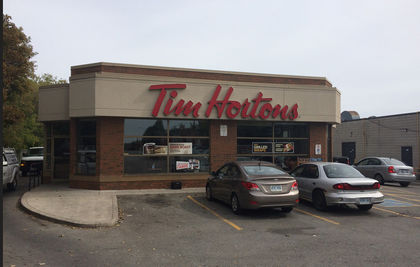

In [89]:
from IPython.display import Image
Image(filename='timhortons_oshawa.jpg')

#### Most Popular Cuisines

> <b> SELECT nodes_Tags.value, COUNT(*) as num
        FROM nodesTags
            JOIN (SELECT DISTINCT(id) FROM nodesTags WHERE value like '%restaurant%') i
            ON nodes_Tags.id=i.id
        WHERE nodes_Tags.key like '%cuisine%'
        GROUP BY nodes_Tags.value
        ORDER BY num DESC
        LIMIT 10; </b>

coffee_shop  10  
pizza  6  
burger  3  
regional  2  
Thai,_Asian,_Take-outs_and_Delivery 1  
Thai,_Sushi,_Asian, 1  
american, 1  
asian 1  
barbecue 1  
breakfast 1  

As you can see, Oshawa is not really a hub of choice when it comes to Eating out. 

#### Most popular Bank

TD Canada Trust  6  
CIBC  4  
Scotiabank  4  
Auto Workers Community Credit Union  2  
RBC Royal Bank  2  

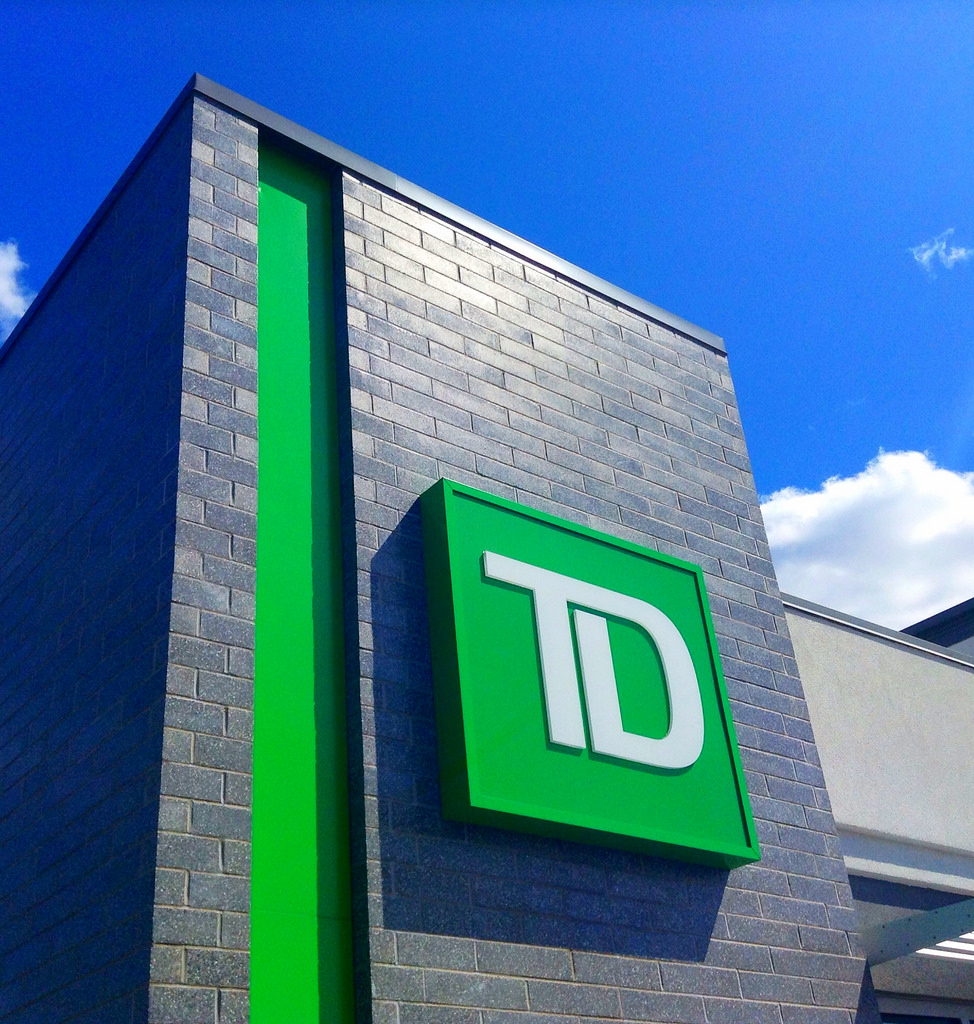

In [93]:
from IPython.display import Image
Image(filename='TD_Bank_Oshawa.jpg')

### Conclusion

This is but a small analysis of the city of Oshawa. The data set is by no means perfect but for this analysis, it has been cleaned as much as possible. We can use this for so many other applications like understanding user preferences by leveraging other open source or closed internal data like branch activities and transactional data. We can also use this kind of analysis to plan new developments around specific businesses or neighbourhoods based on their preferences. This is but a start